In [26]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display


In [31]:
class ReadUsptoDataset:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        
    def load_data(self):
        self.df = pd.read_csv(self.file_path)
        assert "reactions" in list(self.df.columns), f"Expected ['reactions'] in columns, got {list(self.df.columns)}"

        self.df[["reactants", "products"]] = self.df["reactions"].str.split(">>", expand=True)
        self.process_canonical_smiles()

        return self.df
    
    def process_canonical_smiles(self):
        self.df['reactants'] = self.df['reactants'].apply(self.check_smile_validity_and_canonicatize)
        self.df['products'] = self.df['products'].apply(self.check_smile_validity_and_canonicatize)
        self.df.dropna(subset=['reactants', 'products'], inplace=True)
        return self.df
        
    def check_smile_validity_and_canonicatize(self, smiles):
        try:
            mol = Chem.MolFromSmiles(smiles)
            canonical_smiles = Chem.MolToSmiles(mol, canonical=True)
            return canonical_smiles
        except:
            return None
        
    def visualize_reactions(self, num_reactions=5):
        for i, string in enumerate(self.df['reactions'].head(num_reactions)):
            try:
                reaction = AllChem.ReactionFromSmarts(string)
                img = Draw.ReactionToImage(reaction, subImgSize=(200,200))
                display(img)  
                print(f"Parsed Reaction {i}: {reaction}")
            except Exception as e:
                print(f"Error parsing reaction {i}: {e}")    

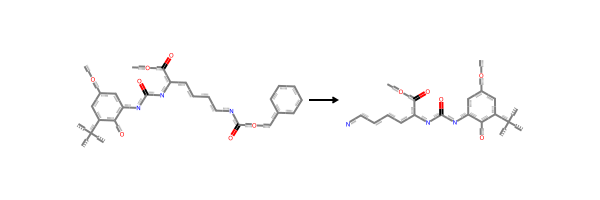

Parsed Reaction 0: <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x11c568040>


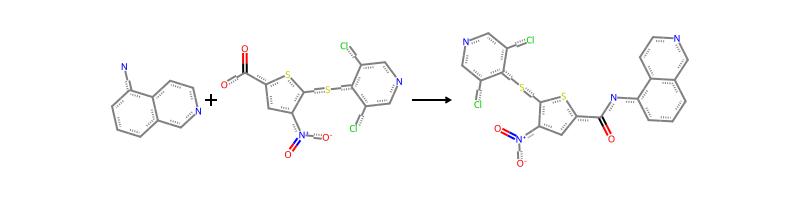

Parsed Reaction 1: <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x11c568ac0>


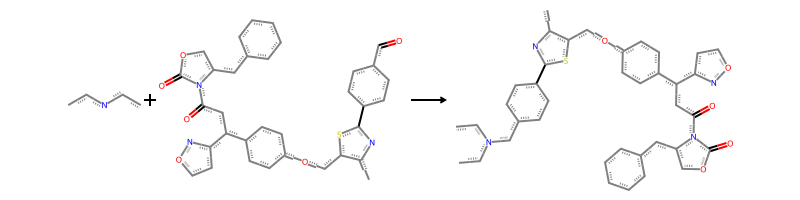

Parsed Reaction 2: <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x11c568040>


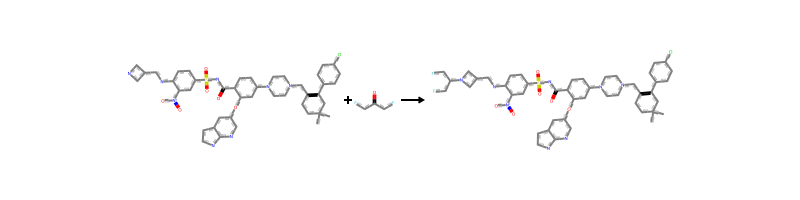

Parsed Reaction 3: <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x11c5689e0>


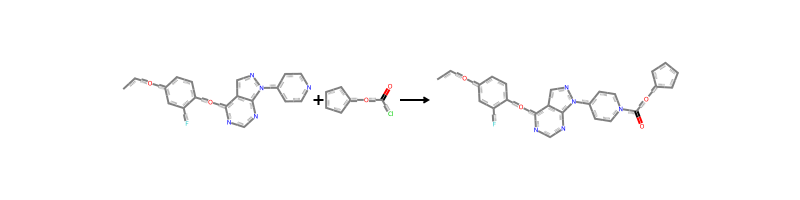

Parsed Reaction 4: <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x11c568ac0>


In [32]:
read_uspto_dataset  = ReadUsptoDataset('uspto_50k.csv')
df_uspto = read_uspto_dataset.load_data()
read_uspto_dataset.visualize_reactions()